# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Desafio
1) Fazer o Sprit da Imagem do Mega Men

### Bibliotecas Utilizadas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os, os.path

### Apresentando a Imagem do MegaMen

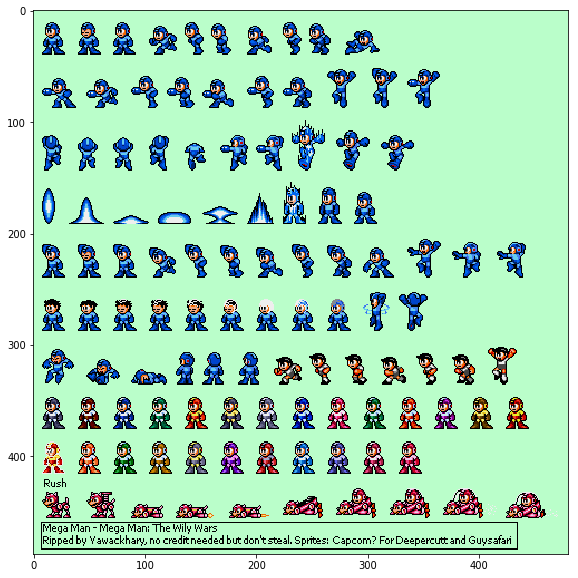

In [2]:
img = cv2.cvtColor(cv2.imread("mega.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

### O Objetivo e fazer o recorte das imagens menores, conforme abaixo:

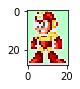

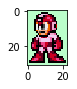

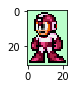

In [3]:
img = cv2.cvtColor(cv2.imread("sprite_1.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(2,1))
ax1.imshow(img)

img = cv2.cvtColor(cv2.imread("sprite_2.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(2,1))
ax1.imshow(img)

img = cv2.cvtColor(cv2.imread("sprite_3.png"), cv2.COLOR_BGR2RGB)
_, ax1 = plt.subplots(figsize=(2,1))
ax1.imshow(img)

### Usando OpenCv

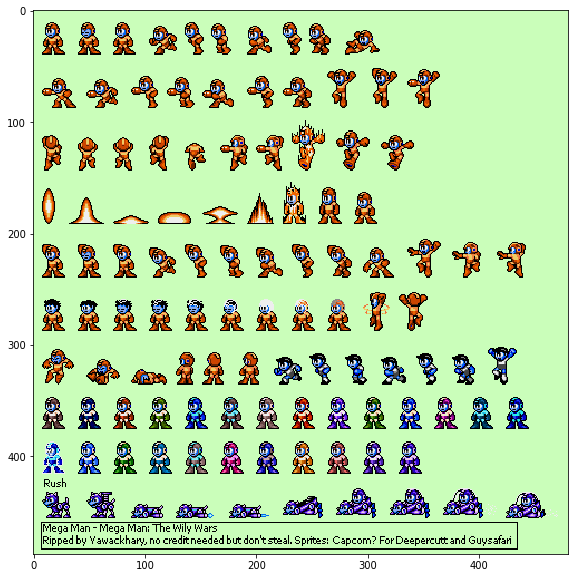

In [4]:
# Carregando a Imagem
image = cv2.imread('mega.png')
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(image)

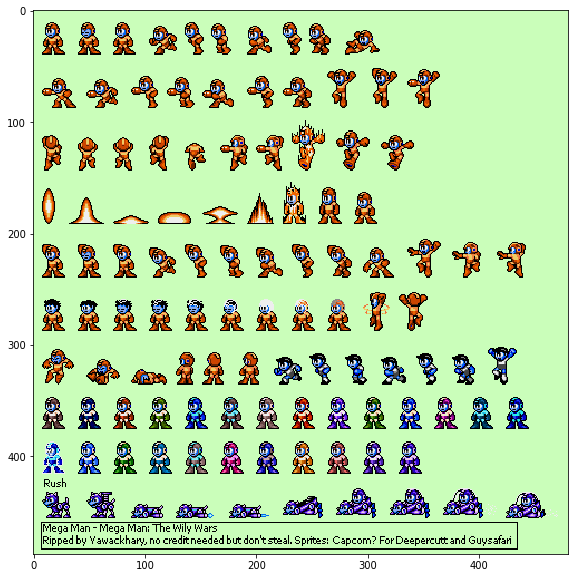

In [5]:
# Criando uma cópia
original = image.copy()
#image = cv2.imread('mega.png')
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(original)

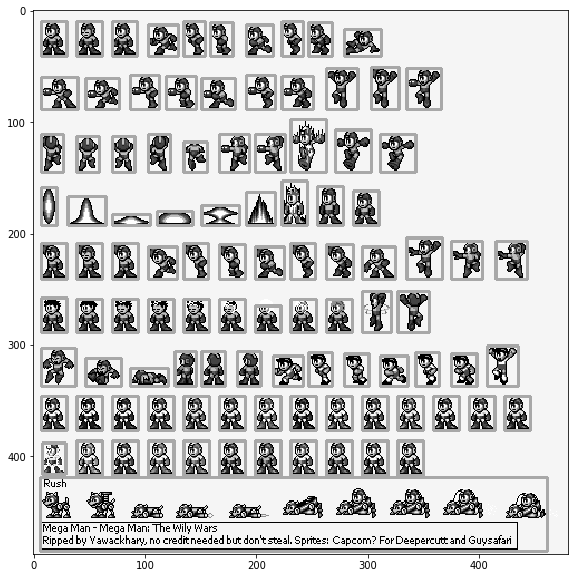

In [19]:
# Convertendo na escala de BR2GRAY
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(gray,cmap='gray')

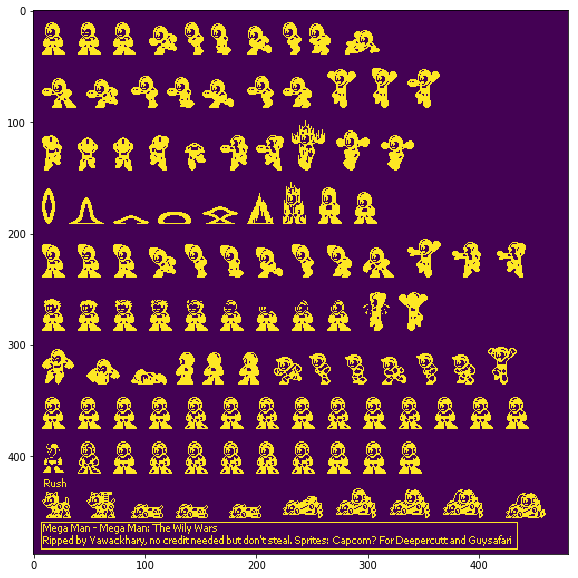

In [7]:
# Aqui usaremos o threshold, 
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)[1]
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(thresh)

In [8]:
### Método GetStructuringElement (MorphShapes, Size) 
##Retorna um elemento de estruturação do tamanho e forma especificados para operações
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [9]:
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

In [10]:
dilate = cv2.dilate(close, kernel, iterations=1)

In [11]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
# matriz de contornos
cnts

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), [array([[[ 25, 419]],
  
         [[ 25, 421]],
  
         [[ 24, 422]],
  
         [[ 16, 422]],
  
         [[ 14, 420]],
  
         [[  9, 420]],
  
         [[  9, 428]],
  
         [[ 10, 428]],
  
         [[ 11, 429]],
  
         [[ 11, 434]],
  
         [[ 10, 435]],
  
         [[ 10, 437]],
  
         [[  9, 438]],
  
         [[  8, 438]],
  
         [[  7, 439]],
  
         [[  7, 441]],
  
         [[  8, 442]],
  
         [[  8, 443]],
  
         [[ 12, 447]],
  
         [[ 14, 447]],
  
         [[ 15, 448]],
  
         [[ 15, 450]],
  
         [[ 14, 451]],
  
         [[ 13, 451]],
  
         [[ 11, 453]],
  
         [[ 11, 457]],
  
         [[ 10, 458]],
  
         [[  6, 458]],
  
         [[  6, 484]],
  
         [[435, 484]]

In [13]:
#Tratamento dos contornos
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [14]:
cnts

[array([[[ 25, 419]],
 
        [[ 25, 421]],
 
        [[ 24, 422]],
 
        [[ 16, 422]],
 
        [[ 14, 420]],
 
        [[  9, 420]],
 
        [[  9, 428]],
 
        [[ 10, 428]],
 
        [[ 11, 429]],
 
        [[ 11, 434]],
 
        [[ 10, 435]],
 
        [[ 10, 437]],
 
        [[  9, 438]],
 
        [[  8, 438]],
 
        [[  7, 439]],
 
        [[  7, 441]],
 
        [[  8, 442]],
 
        [[  8, 443]],
 
        [[ 12, 447]],
 
        [[ 14, 447]],
 
        [[ 15, 448]],
 
        [[ 15, 450]],
 
        [[ 14, 451]],
 
        [[ 13, 451]],
 
        [[ 11, 453]],
 
        [[ 11, 457]],
 
        [[ 10, 458]],
 
        [[  6, 458]],
 
        [[  6, 484]],
 
        [[435, 484]],
 
        [[435, 457]],
 
        [[436, 456]],
 
        [[439, 456]],
 
        [[440, 455]],
 
        [[442, 455]],
 
        [[443, 456]],
 
        [[457, 456]],
 
        [[460, 453]],
 
        [[460, 450]],
 
        [[459, 449]],
 
        [[459, 447]],
 
        [[457, 4

In [15]:
#Inicializando uma variavel para ser o contador
sprite_number = 0

-1

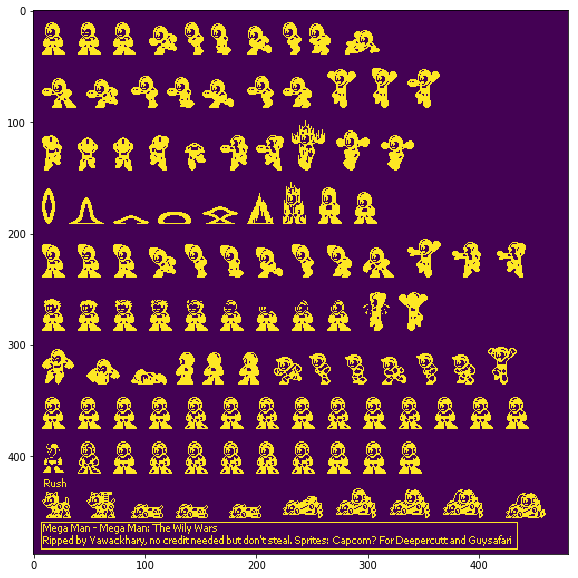

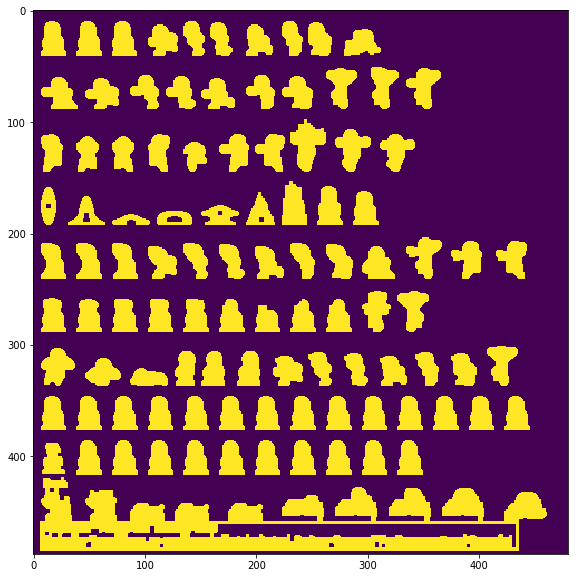

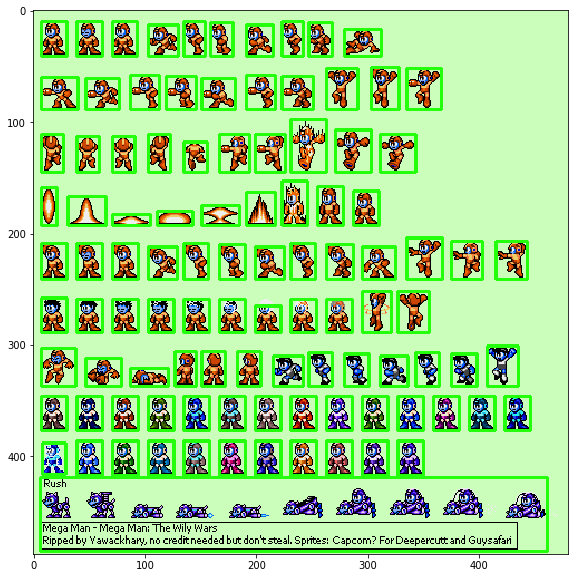

In [16]:
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('sprite_{}.png'.format(sprite_number), ROI)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    sprite_number += 1

_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(thresh)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(dilate)
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(image)
    
# cv2.imshow('thresh', thresh)
# cv2.imshow('dilate', dilate)
# cv2.imshow('image', image)
cv2.waitKey()

In [17]:
import os, os.path
qtd_arq = len([name for name in os.listdir('.') if os.path.isfile(name)])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


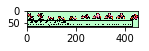

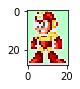

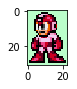

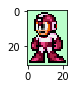

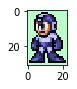

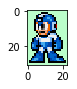

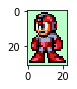

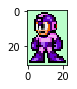

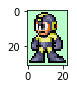

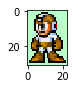

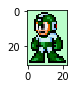

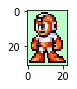

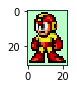

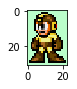

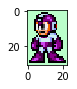

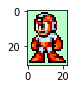

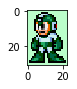

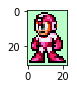

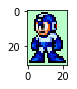

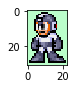

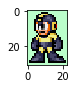

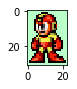

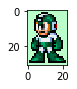

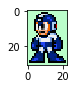

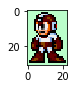

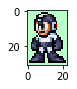

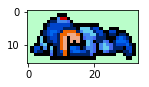

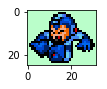

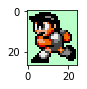

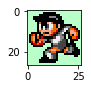

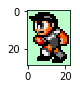

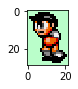

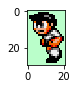

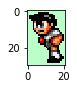

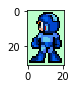

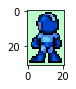

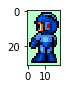

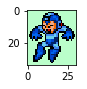

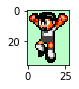

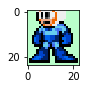

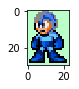

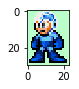

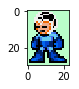

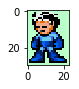

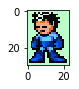

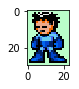

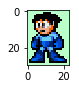

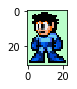

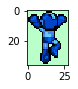

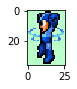

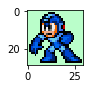

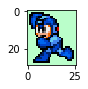

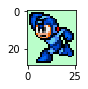

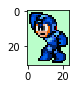

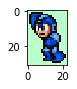

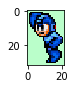

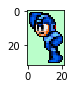

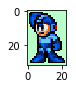

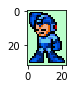

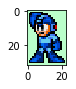

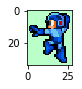

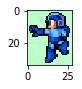

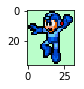

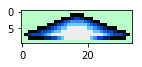

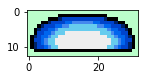

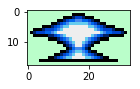

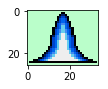

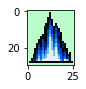

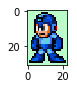

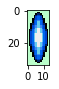

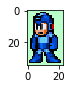

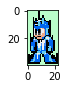

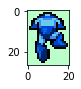

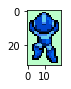

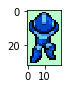

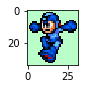

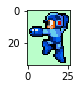

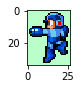

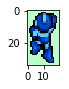

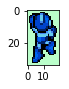

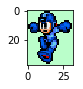

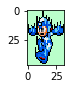

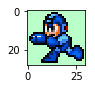

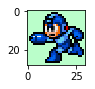

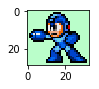

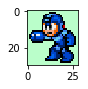

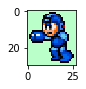

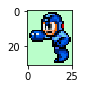

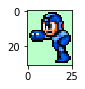

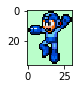

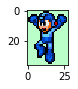

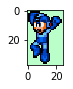

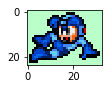

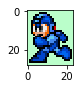

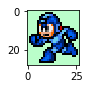

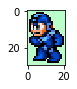

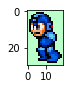

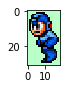

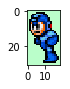

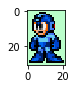

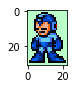

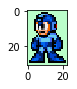

In [18]:
for i in range(qtd_arq):
    nome="sprite_"+str(i)+".png"
    img = cv2.cvtColor(cv2.imread(nome), cv2.COLOR_BGR2RGB)
    _, ax1 = plt.subplots(figsize=(2,1))
    ax1.imshow(img)